In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [7]:
G = 100
M = 240
m = 10
m_small = 1
mu = m * M / (m + M)
r = 100
com = r * m / (m + M)
r_M = com
r_m = r - com
omega = math.sqrt(G * M / (r_m * r**2))

a, b, c = (M - m) / m, -2 * r * M / m, M * r**2 / m
cop = (-b - math.sqrt(b**2 - 4 * a * c))/(2 * a)

def L1(x, iterations):
    for i in range(iterations):
        x = math.sqrt((m / M) * r_m * r**2 * (r - x)**2 / (r_m * r**2 - (r_m - x) * (r - x)**2))
    return r - x

def L2(x, iterations):
    for i in range(iterations):
        x = math.sqrt((m / M) * r_m * r**2 * (r + x)**2 / ((r_m + x) * (r + x)**2 - r_m * r**2))
    return r + x

def L3(x, iterations):
    for i in range(iterations):
        x = math.sqrt((M / m) * r_M * r**2 * (r + x)**2 / ((r_M + x) * (r + x)**2 - r_M * r**2))
    return -x

def L4():
    return r / 2, r * math.sqrt(3) / 2

def L5():
    return r / 2, -r * math.sqrt(3) / 2

def f(x, y):
    d = np.sqrt((x - com)**2 + y**2)
    L = m_small * d**2 * omega
    return -G * M * m_small / np.sqrt(x**2 + y**2) - G * m * m_small / np.sqrt((r - x)**2 + y**2) - L**2 / (2 * m_small * d**2)

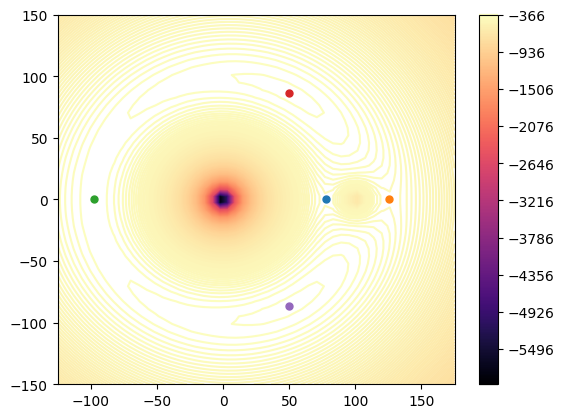

In [8]:
c = 1.5
x = np.linspace(-125, 175, 50)
y = np.linspace(-c * r, c * r, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

plt.contour(X, Y, Z, 1000, cmap='magma');
plt.plot(L1(cop, 100), 0, marker='o', markersize=5)
plt.plot(L2(cop, 100), 0, marker='o', markersize=5)
plt.plot(L3(cop, 100), 0, marker='o', markersize=5)
l_x, l_y = L4()
plt.plot(l_x, l_y, marker='o', markersize=5)
l_x, l_y = L5()
plt.plot(l_x, l_y, marker='o', markersize=5)
plt.colorbar();